In [4]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# Lab | Natural Language Processing
### SMS: SPAM or HAM

### Let's prepare the environment

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

- Read Data for the Fraudulent Email Kaggle Challenge
- Reduce the training set to speead up development. 

In [6]:
## Read Data for the Fraudulent Email Kaggle Challenge
data = pd.read_csv(r"C:\Users\diogo\IRONHACK\Bootcamp\WEEK 7\DAY 1\LAB\lab-natural-language-processing\data\kg_train.csv",encoding='latin-1')

# Reduce the training set to speed up development. 
# Modify for final system
data = data.head(1000)
print(data.shape)
data.fillna("",inplace=True)
data.head()

(1000, 2)


,text,label
0,"DEAR SIR, STRICTLY A PRIVATE BUSINESS PROPOSAL...",1
1,Will do.,0
2,Nora--Cheryl has emailed dozens of memos about...,0
3,Dear Sir=2FMadam=2C I know that this proposal ...,1
4,fyi,0


### Let's divide the training and test set into two partitions

In [7]:
X = data["text"]     
y = data["label"]    


In [10]:
from sklearn.model_selection import train_test_split

data_train,data_val = train_test_split(
    data,
    test_size=0.2,      
    random_state=42         
)

print("Train size:", data_train.shape)
print("Test size:", data_val.shape)


Train size: (800, 2)
Test size: (200, 2)


## Data Preprocessing

In [11]:
import string
from nltk.corpus import stopwords
print(string.punctuation)
print(stopwords.words("english")[100:110])
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer('english')

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on']


## Now, we have to clean the html code removing words

- First we remove inline JavaScript/CSS
- Then we remove html comments. This has to be done before removing regular tags since comments can contain '>' characters
- Next we can remove the remaining tags

In [25]:
import re

def clean_html(text):
    if not isinstance(text, str):
        return ""

    # Remove inline JavaScript and CSS
    text = re.sub(r"<script.*?</script>", "", text, flags=re.DOTALL | re.IGNORECASE)
    text = re.sub(r"<style.*?</style>", "", text, flags=re.DOTALL | re.IGNORECASE)

    # Remove HTML comments (must be before tags)
    text = re.sub(r"<!--.*?-->", "", text, flags=re.DOTALL)

    # Remove remaining HTML tags
    text = re.sub(r"<[^>]+>", " ", text)

    # Clean extra spaces
    text = re.sub(r"\s+", " ", text).strip()

    return text


In [26]:
# Apply to dataset
data_train["clean_text"] = data_train["text"].apply(clean_html)
data_val["clean_text"] = data_val["text"].apply(clean_html)
data.head()

,text,label
0,"DEAR SIR, STRICTLY A PRIVATE BUSINESS PROPOSAL...",1
1,Will do.,0
2,Nora--Cheryl has emailed dozens of memos about...,0
3,Dear Sir=2FMadam=2C I know that this proposal ...,1
4,fyi,0


- Remove all the special characters
    
- Remove numbers
    
- Remove all single characters
 
- Remove single characters from the start

- Substitute multiple spaces with single space

- Remove prefixed 'b'

- Convert to Lowercase

In [27]:

def clean_text(text):
    if not isinstance(text, str):
        return ""

    # Remove special characters (keep letters and spaces)
    text = re.sub(r"[^a-zA-Z ]", " ", text)

    # Remove numbers
    text = re.sub(r"\d+", " ", text)

    # Remove single characters (isolated letters)
    text = re.sub(r"\b[a-zA-Z]\b", " ", text)

    # Remove single characters from the start (e.g. " t" at start of word)
    text = re.sub(r"\b[a-zA-Z]\s+", " ", text)

    # Replace multiple spaces with one space
    text = re.sub(r"\s+", " ", text)

    # Remove prefixed 'b' (common when decoding bytes → "b'text'")
    text = re.sub(r"^b\s+", "", text)

    # Lowercase
    text = text.lower().strip()

    return text
data.head()

,text,label
0,"DEAR SIR, STRICTLY A PRIVATE BUSINESS PROPOSAL...",1
1,Will do.,0
2,Nora--Cheryl has emailed dozens of memos about...,0
3,Dear Sir=2FMadam=2C I know that this proposal ...,1
4,fyi,0


In [29]:


data_train["preprocessed_text"] = data_train["clean_text"].apply(clean_text)
data_val["preprocessed_text"] = data_val["clean_text"].apply(clean_text)
data_train.head()

,text,label,clean_text,preprocessed_text
29,"----------- REGARDS, MR NELSON SMITH.KINDLY RE...",1,"----------- REGARDS, MR NELSON SMITH.KINDLY RE...",regards mr nelson smith kindly reply me on my ...
535,I have not been able to reach oscar this am. W...,0,I have not been able to reach oscar this am. W...,have not been able to reach oscar this am we a...
695,; Huma Abedin B6I'm checking with Pat on the 5...,0,; Huma Abedin B6I'm checking with Pat on the 5...,huma abedin checking with pat on the will work...
557,I can have it announced here on Monday - can't...,0,I can have it announced here on Monday - can't...,can have it announced here on monday can today
836,BANK OF AFRICAAGENCE SAN PEDRO14 BP 1210 S...,1,BANK OF AFRICAAGENCE SAN PEDRO14 BP 1210 San P...,bank of africaagence san pedro bp san pedro co...


## Now let's work on removing stopwords
Remove the stopwords.

In [31]:
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

data_train["no_stopwords"] = data_train["preprocessed_text"].apply(remove_stopwords)
data_val["no_stopwords"] = data_val["preprocessed_text"].apply(remove_stopwords)
data_train.head()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diogo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label,clean_text,preprocessed_text,no_stopwords
29,"----------- REGARDS, MR NELSON SMITH.KINDLY RE...",1,"----------- REGARDS, MR NELSON SMITH.KINDLY RE...",regards mr nelson smith kindly reply me on my ...,regards mr nelson smith kindly reply private e...
535,I have not been able to reach oscar this am. W...,0,I have not been able to reach oscar this am. W...,have not been able to reach oscar this am we a...,able reach oscar supposed send pdb receive
695,; Huma Abedin B6I'm checking with Pat on the 5...,0,; Huma Abedin B6I'm checking with Pat on the 5...,huma abedin checking with pat on the will work...,huma abedin checking pat work jack jake rest a...
557,I can have it announced here on Monday - can't...,0,I can have it announced here on Monday - can't...,can have it announced here on monday can today,announced monday today
836,BANK OF AFRICAAGENCE SAN PEDRO14 BP 1210 S...,1,BANK OF AFRICAAGENCE SAN PEDRO14 BP 1210 San P...,bank of africaagence san pedro bp san pedro co...,bank africaagence san pedro bp san pedro cote ...


## Tame Your Text with Lemmatization
Break sentences into words, then use lemmatization to reduce them to their base form (e.g., "running" becomes "run"). See how this creates cleaner data for analysis!

In [32]:
import nltk
nltk.download("wordnet")
nltk.download("omw-1.4")  
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmas = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmas)

data_train["lemmatized"] = data_train["no_stopwords"].apply(lemmatize_text)
data_val["lemmatized"] = data_val["no_stopwords"].apply(lemmatize_text)



data_train.head()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\diogo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\diogo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,text,label,clean_text,preprocessed_text,no_stopwords,lemmatized
29,"----------- REGARDS, MR NELSON SMITH.KINDLY RE...",1,"----------- REGARDS, MR NELSON SMITH.KINDLY RE...",regards mr nelson smith kindly reply me on my ...,regards mr nelson smith kindly reply private e...,regard mr nelson smith kindly reply private em...
535,I have not been able to reach oscar this am. W...,0,I have not been able to reach oscar this am. W...,have not been able to reach oscar this am we a...,able reach oscar supposed send pdb receive,able reach oscar supposed send pdb receive
695,; Huma Abedin B6I'm checking with Pat on the 5...,0,; Huma Abedin B6I'm checking with Pat on the 5...,huma abedin checking with pat on the will work...,huma abedin checking pat work jack jake rest a...,huma abedin checking pat work jack jake rest a...
557,I can have it announced here on Monday - can't...,0,I can have it announced here on Monday - can't...,can have it announced here on monday can today,announced monday today,announced monday today
836,BANK OF AFRICAAGENCE SAN PEDRO14 BP 1210 S...,1,BANK OF AFRICAAGENCE SAN PEDRO14 BP 1210 San P...,bank of africaagence san pedro bp san pedro co...,bank africaagence san pedro bp san pedro cote ...,bank africaagence san pedro bp san pedro cote ...


## Bag Of Words
Let's get the 10 top words in ham and spam messages (**EXPLORATORY DATA ANALYSIS**)

In [33]:
# Split the dataset into ham and spam
ham_texts = data_train[data_train["label"] == 0]["lemmatized"]
spam_texts = data_train[data_train["label"] == 1]["lemmatized"]


from collections import Counter

# Join all messages into one long string
ham_words = " ".join(ham_texts).split()
spam_words = " ".join(spam_texts).split()

# Count frequencies
ham_top10 = Counter(ham_words).most_common(10)
spam_top10 = Counter(spam_words).most_common(10)

print("Top 10 words in HAM:")
print(ham_top10)

print("\nTop 10 words in SPAM:")
print(spam_top10)



Top 10 words in HAM:
[('state', 117), ('pm', 97), ('would', 94), ('president', 89), ('mr', 89), ('time', 81), ('percent', 80), ('obama', 77), ('call', 74), ('secretary', 74)]

Top 10 words in SPAM:
[('money', 847), ('account', 743), ('bank', 646), ('fund', 626), ('u', 600), ('transaction', 471), ('business', 424), ('mr', 423), ('country', 422), ('million', 370)]


In [34]:
import pandas as pd

ham_df = pd.DataFrame(ham_top10, columns=["word", "count"])
spam_df = pd.DataFrame(spam_top10, columns=["word", "count"])

ham_df, spam_df


(        word  count
 0      state    117
 1         pm     97
 2      would     94
 3  president     89
 4         mr     89
 5       time     81
 6    percent     80
 7      obama     77
 8       call     74
 9  secretary     74,
           word  count
 0        money    847
 1      account    743
 2         bank    646
 3         fund    626
 4            u    600
 5  transaction    471
 6     business    424
 7           mr    423
 8      country    422
 9      million    370)

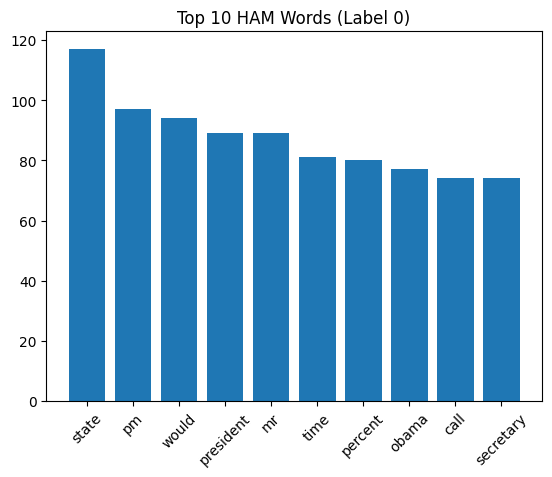

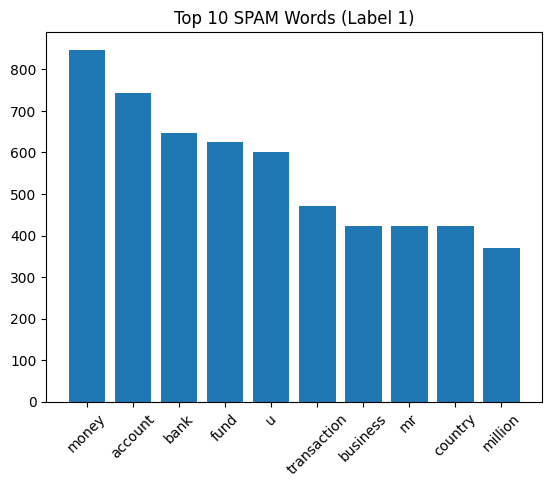

In [35]:
import matplotlib.pyplot as plt

# HAM plot
words, counts = zip(*ham_top10)
plt.bar(words, counts)
plt.title("Top 10 HAM Words (Label 0)")
plt.xticks(rotation=45)
plt.show()

# SPAM plot
words, counts = zip(*spam_top10)
plt.bar(words, counts)
plt.title("Top 10 SPAM Words (Label 1)")
plt.xticks(rotation=45)
plt.show()


## Extra features

In [37]:
# We add to the original dataframe two additional indicators (money symbols and suspicious words).
money_simbol_list = "|".join(["euro","dollar","pound","€",r"\$"])
suspicious_words = "|".join(["free","cheap","sex","money","account","bank","fund","transfer","transaction","win","deposit","password"])

data_train['money_mark'] = data_train['lemmatized'].str.contains(money_simbol_list)*1
data_train['suspicious_words'] = data_train['lemmatized'].str.contains(suspicious_words)*1
data_train['text_len'] = data_train['lemmatized'].apply(lambda x: len(x)) 

data_val['money_mark'] = data_val['lemmatized'].str.contains(money_simbol_list)*1
data_val['suspicious_words'] = data_val['lemmatized'].str.contains(suspicious_words)*1
data_val['text_len'] = data_val['lemmatized'].apply(lambda x: len(x)) 

data_train.head()

        

,text,label,clean_text,preprocessed_text,no_stopwords,lemmatized,money_mark,suspicious_words,text_len
29,"----------- REGARDS, MR NELSON SMITH.KINDLY RE...",1,"----------- REGARDS, MR NELSON SMITH.KINDLY RE...",regards mr nelson smith kindly reply me on my ...,regards mr nelson smith kindly reply private e...,regard mr nelson smith kindly reply private em...,0,0,79
535,I have not been able to reach oscar this am. W...,0,I have not been able to reach oscar this am. W...,have not been able to reach oscar this am we a...,able reach oscar supposed send pdb receive,able reach oscar supposed send pdb receive,0,0,42
695,; Huma Abedin B6I'm checking with Pat on the 5...,0,; Huma Abedin B6I'm checking with Pat on the 5...,huma abedin checking with pat on the will work...,huma abedin checking pat work jack jake rest a...,huma abedin checking pat work jack jake rest a...,0,0,76
557,I can have it announced here on Monday - can't...,0,I can have it announced here on Monday - can't...,can have it announced here on monday can today,announced monday today,announced monday today,0,0,22
836,BANK OF AFRICAAGENCE SAN PEDRO14 BP 1210 S...,1,BANK OF AFRICAAGENCE SAN PEDRO14 BP 1210 San P...,bank of africaagence san pedro bp san pedro co...,bank africaagence san pedro bp san pedro cote ...,bank africaagence san pedro bp san pedro cote ...,1,1,1050


## How would work the Bag of Words with Count Vectorizer concept?

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the CountVectorizer
cv = CountVectorizer()

# Fit on training data and transform
X_train_bow = cv.fit_transform(data_train["lemmatized"])

# Transform validation data 
X_val_bow = cv.transform(data_val["lemmatized"])

# Check shapes
print("Train BoW shape:", X_train_bow.shape)
print("Validation BoW shape:", X_val_bow.shape)

# see some feature names (words)
print("First 20 vocabulary words:")
print(cv.get_feature_names_out()[:20])




Train BoW shape: (800, 28042)
Validation BoW shape: (200, 28042)
First 20 vocabulary words:
['aa' 'aaa' 'aabeiawaeaambiqaceqedeqh' 'aac' 'aacute' 'aacw' 'aae'
 'aaecaxeebsexbhjbuqdhcrmimoeifekrobhbcsmzuvavynlrchyknoel' 'aaegmdbsch'
 'aaeh' 'aaevvsghq' 'aafh' 'aaftmjiprqbge' 'aafyb' 'aafyuzt' 'aagadrk'
 'aagcdm' 'aaghhq' 'aahfx' 'aahjjb']


In [50]:
vocab = cv.get_feature_names_out()
df = pd.DataFrame(X_train_bow.toarray(), columns=vocab)

df.head()

,aa,aaa,aabeiawaeaambiqaceqedeqh,aac,aacute,aacw,aae,aaecaxeebsexbhjbuqdhcrmimoeifekrobhbcsmzuvavynlrchyknoel,aaegmdbsch,aaeh,...,zzwh,zzwqgb,zzwqgdg,zzwqgyw,zzwx,zzxh,zzxmsihdoawxlig,zzz,zzzahbxntxe,zzzj
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF

- Load the vectorizer

- Vectorize all dataset

- print the shape of the vetorized dataset

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the CountVectorizer
tfidf = TfidfVectorizer()

# Fit on training data and transform
X_train_tfidf = tfidf.fit_transform(data_train["lemmatized"])

# Transform validation data 
X_val_tfidf = tfidf.transform(data_val["lemmatized"])


X_val_tfidf.shape



(200, 28042)

## And the Train a Classifier?

In [63]:

X_train = tfidf.fit_transform(data_train["lemmatized"])
X_val   = tfidf.transform(data_val["lemmatized"])


In [64]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

clf = MultinomialNB()

# Train
clf.fit(X_train, data_train["label"])

# Predict
y_pred = clf.predict(X_val)

# Evaluate
print("Accuracy:", accuracy_score(data_val["label"], y_pred))
print(classification_report(data_val["label"], y_pred))


Accuracy: 0.935
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       125
           1       0.85      1.00      0.92        75

    accuracy                           0.94       200
   macro avg       0.93      0.95      0.93       200
weighted avg       0.94      0.94      0.94       200



### Extra Task - Implement a SPAM/HAM classifier

https://www.kaggle.com/t/b384e34013d54d238490103bc3c360ce

The classifier can not be changed!!! It must be the MultinimialNB with default parameters!

Your task is to **find the most relevant features**.

For example, you can test the following options and check which of them performs better:
- Using "Bag of Words" only
- Using "TF-IDF" only
- Bag of Words + extra flags (money_mark, suspicious_words, text_len)
- TF-IDF + extra flags


You can work with teams of two persons (recommended).

In [ ]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report
from scipy.sparse import hstack, csr_matrix

# Load dataset

data = pd.read_csv(
    r"C:\Users\diogo\IRONHACK\Bootcamp\WEEK 7\DAY 1\LAB\lab-natural-language-processing\data\kg_train.csv",
    encoding="latin-1"
)

data.columns = ["text", "label"]
data["text"] = data["text"].fillna("")
data["label"] = data["label"].astype(int)

print(data.head())
print(data["label"].value_counts())

# Train and Split

X_train, X_test, y_train, y_test = train_test_split(
    data["text"],
    data["label"],
    test_size=0.2,
    random_state=42,
    stratify=data["label"]
)

# Extra features (flags)

def extra_features(text):
    text_lower = text.lower()
    money = int(bool(re.search(r"\$|€|£|money|cash|usd|eur", text_lower)))
    suspicious = int(bool(re.search(r"free|win|winner|offer|credit|click|urgent|prize", text_lower)))
    length = len(text_lower.split())
    return money, suspicious, length

extra_train = np.array([extra_features(t) for t in X_train])
extra_test = np.array([extra_features(t) for t in X_test])

extra_train_sp = csr_matrix(extra_train)
extra_test_sp = csr_matrix(extra_test)

results = []

# Model 1 Bag of Words only

cv = CountVectorizer(stop_words="english")
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

clf_cv = MultinomialNB()
clf_cv.fit(X_train_cv, y_train)
y_pred_cv = clf_cv.predict(X_test_cv)

acc_cv = accuracy_score(y_test, y_pred_cv)
f1_cv = f1_score(y_test, y_pred_cv)

results.append(("Bag of Words", acc_cv, f1_cv))

print("\n=== MODEL 1: BAG OF WORDS ONLY ===")
print("Accuracy:", acc_cv)
print("F1-score:", f1_cv)
print(classification_report(y_test, y_pred_cv))

# Model TF-IDF only

tfidf = TfidfVectorizer(stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf_tfidf = MultinomialNB()
clf_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)

acc_tfidf = accuracy_score(y_test, y_pred_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf)

results.append(("TF-IDF", acc_tfidf, f1_tfidf))

print("\n=== MODEL 2: TF-IDF ONLY ===")
print("Accuracy:", acc_tfidf)
print("F1-score:", f1_tfidf)
print(classification_report(y_test, y_pred_tfidf))

# Model 3 Bow and extra flags

X_train_cv_extra = hstack([X_train_cv, extra_train_sp])
X_test_cv_extra = hstack([X_test_cv, extra_test_sp])

clf_cv_extra = MultinomialNB()
clf_cv_extra.fit(X_train_cv_extra, y_train)
y_pred_cv_extra = clf_cv_extra.predict(X_test_cv_extra)

acc_cv_extra = accuracy_score(y_test, y_pred_cv_extra)
f1_cv_extra = f1_score(y_test, y_pred_cv_extra)

results.append(("BoW + Extra Flags", acc_cv_extra, f1_cv_extra))

print("\n=== MODEL 3: BAG OF WORDS + EXTRA FLAGS ===")
print("Accuracy:", acc_cv_extra)
print("F1-score:", f1_cv_extra)
print(classification_report(y_test, y_pred_cv_extra))

# Model 4 TF-IDF and extra flags

X_train_tfidf_extra = hstack([X_train_tfidf, extra_train_sp])
X_test_tfidf_extra = hstack([X_test_tfidf, extra_test_sp])

clf_tfidf_extra = MultinomialNB()
clf_tfidf_extra.fit(X_train_tfidf_extra, y_train)
y_pred_tfidf_extra = clf_tfidf_extra.predict(X_test_tfidf_extra)

acc_tfidf_extra = accuracy_score(y_test, y_pred_tfidf_extra)
f1_tfidf_extra = f1_score(y_test, y_pred_tfidf_extra)

results.append(("TF-IDF + Extra Flags", acc_tfidf_extra, f1_tfidf_extra))

print("\n=== MODEL 4: TF-IDF + EXTRA FLAGS ===")
print("Accuracy:", acc_tfidf_extra)
print("F1-score:", f1_tfidf_extra)
print(classification_report(y_test, y_pred_tfidf_extra))

# Model comparisson

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1"])
print("\n=== MODEL COMPARISON ===")
print(results_df)

# Top SPAM features

import numpy as np

top_n = 20

# Bag of Words
feature_names_cv = cv.get_feature_names_out()
log_probs_cv = clf_cv.feature_log_prob_[1]
idx_cv = np.argsort(log_probs_cv)[-top_n:]
print("\n=== TOP SPAM WORDS (BAG OF WORDS) ===")
for w, lp in sorted(zip(feature_names_cv[idx_cv], log_probs_cv[idx_cv]), key=lambda x: -x[1]):
    print(f"{w:20s}  log_prob={lp:.3f}")

# BOW + Flags
feature_names_cv_extra = list(cv.get_feature_names_out()) + ["money_mark", "suspicious_words", "text_len"]
log_probs_cv_extra = clf_cv_extra.feature_log_prob_[1]
idx_cv_e = np.argsort(log_probs_cv_extra)[-top_n:]
print("\n=== TOP SPAM FEATURES (BOW + EXTRA) ===")
for feat, lp in sorted(zip([feature_names_cv_extra[i] for i in idx_cv_e], log_probs_cv_extra[idx_cv_e]), key=lambda x: -x[1]):
    print(f"{feat:20s}  log_prob={lp:.3f}")

# TF-IDF
feature_names_tfidf = tfidf.get_feature_names_out()
log_probs_tfidf = clf_tfidf.feature_log_prob_[1]
idx_tfidf = np.argsort(log_probs_tfidf)[-top_n:]
print("\n=== TOP SPAM WORDS (TF-IDF) ===")
for w, lp in sorted(zip(feature_names_tfidf[idx_tfidf], log_probs_tfidf[idx_tfidf]), key=lambda x: -x[1]):
    print(f"{w:20s}  log_prob={lp:.3f}")

#TF-IDF + Flags
feature_names_tfidf_extra = list(tfidf.get_feature_names_out()) + ["money_mark", "suspicious_words", "text_len"]
log_probs_tfidf_extra = clf_tfidf_extra.feature_log_prob_[1]
idx_tfidf_e = np.argsort(log_probs_tfidf_extra)[-top_n:]
print("\n=== TOP SPAM FEATURES (TF-IDF + EXTRA) ===")
for feat, lp in sorted(zip([feature_names_tfidf_extra[i] for i in idx_tfidf_e], log_probs_tfidf_extra[idx_tfidf_e]), key=lambda x: -x[1]):
    print(f"{feat:20s}  log_prob={lp:.3f}")


                                                text  label
0  DEAR SIR, STRICTLY A PRIVATE BUSINESS PROPOSAL...      1
1                                           Will do.      0
2  Nora--Cheryl has emailed dozens of memos about...      0
3  Dear Sir=2FMadam=2C I know that this proposal ...      1
4                                                fyi      0
label
0    3386
1    2578
Name: count, dtype: int64

=== MODEL 1: BAG OF WORDS ONLY ===
Accuracy: 0.9706621961441744
F1-score: 0.9666348903717826
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       677
           1       0.95      0.98      0.97       516

    accuracy                           0.97      1193
   macro avg       0.97      0.97      0.97      1193
weighted avg       0.97      0.97      0.97      1193


=== MODEL 2: TF-IDF ONLY ===
Accuracy: 0.9706621961441744
F1-score: 0.966698382492864
              precision    recall  f1-score   support

           0       0.99  